Relevant links:

https://github.com/etown/dl1/blob/master/UrbanSoundClassification.ipynb
https://colab.research.google.com/drive/1MkBTaGQA4PG9ruLkL2wqmyH01eDiE_HO?authuser=1#scrollTo=XS-7ojV34x8m`

The above links were some of the inspirations of this project, both related to the Fast.ai course.

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

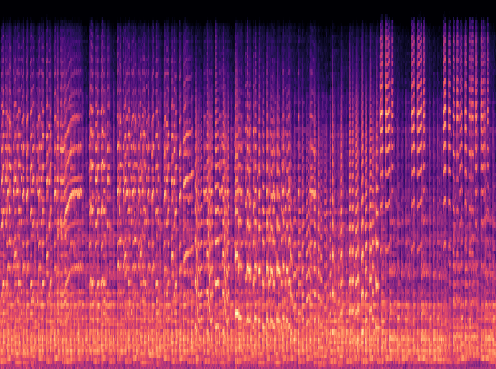

In [ ]:
dest = '/content/gdrive/MyDrive/Colab Notebooks/Music/new images/jazz/0.png'
im = Image.open(dest)
im

In [ ]:
path = Path('/content/gdrive/MyDrive/Colab Notebooks/Music/new images')

In [ ]:
fns = get_image_files(path)
fns

(#299) [Path('/content/gdrive/MyDrive/Colab Notebooks/Music/new images/pop/43.png'),Path('/content/gdrive/MyDrive/Colab Notebooks/Music/new images/pop/26.png'),Path('/content/gdrive/MyDrive/Colab Notebooks/Music/new images/pop/74.png'),Path('/content/gdrive/MyDrive/Colab Notebooks/Music/new images/pop/24.png'),Path('/content/gdrive/MyDrive/Colab Notebooks/Music/new images/pop/28.png'),Path('/content/gdrive/MyDrive/Colab Notebooks/Music/new images/pop/80.png'),Path('/content/gdrive/MyDrive/Colab Notebooks/Music/new images/pop/19.png'),Path('/content/gdrive/MyDrive/Colab Notebooks/Music/new images/pop/90.png'),Path('/content/gdrive/MyDrive/Colab Notebooks/Music/new images/pop/44.png'),Path('/content/gdrive/MyDrive/Colab Notebooks/Music/new images/pop/37.png')...]

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
failed.map(Path.unlink);

In [ ]:
genres = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

In [ ]:
dls = genres.dataloaders(path)

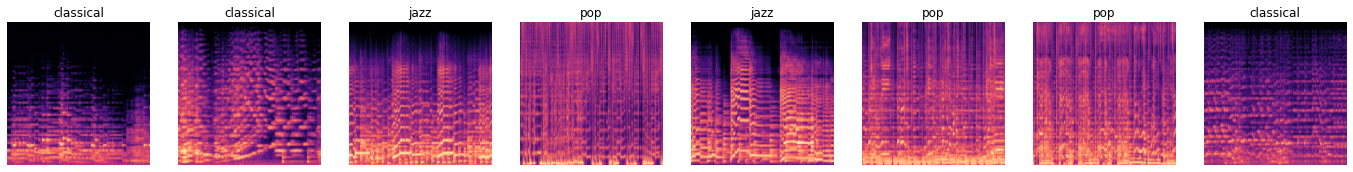

In [ ]:
dls.valid.show_batch(max_n=8, nrows=1)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3)
learn.unfreeze()
learn.fit_one_cycle(1)
learn.fit_one_cycle(10, lr_max=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.734016,1.522591,0.762712,00:03
1,1.347441,0.808100,0.406780,00:03
2,1.026730,0.607886,0.288136,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.578824,0.470135,0.152542,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.267163,0.483226,0.101695,00:03
1,0.222514,0.324548,0.101695,00:03
2,0.220611,0.219118,0.050847,00:03
3,0.176190,0.219833,0.050847,00:03
4,0.143059,0.243628,0.050847,00:03
5,0.121395,0.243033,0.050847,00:03
6,0.102817,0.239163,0.033898,00:03
7,0.088922,0.237574,0.033898,00:03
8,0.077411,0.234067,0.033898,00:03
9,0.070028,0.233971,0.033898,00:03


It seems that we resulted in an error rate of 3.3%, seems pretty good, but I am not 100% sure on how it would reflect in actual application. 

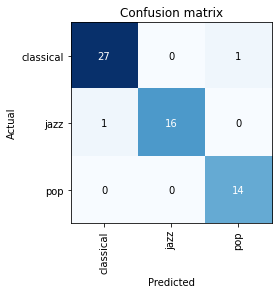

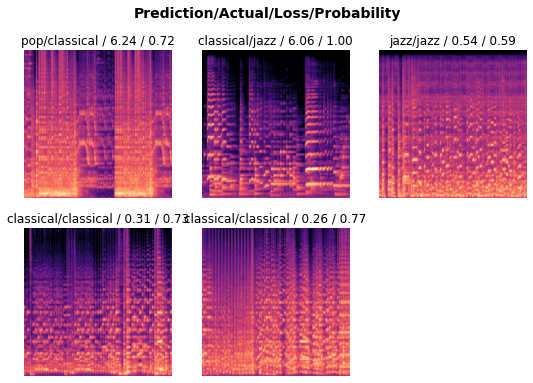

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(k=5)

SuggestedLRs(lr_min=0.0003019951749593019, lr_steep=1.3182567499825382e-06)

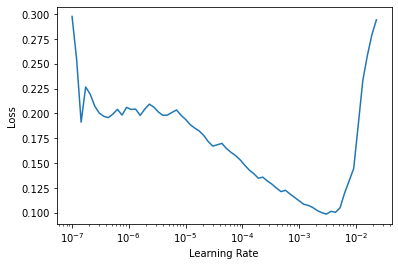

In [ ]:
learn.lr_find()

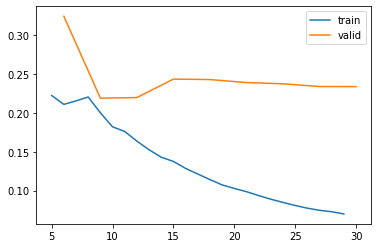

In [ ]:
learn.recorder.plot_loss()

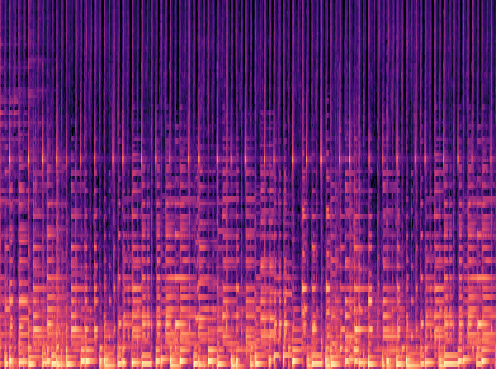

In [ ]:
file = '/content/gdrive/MyDrive/Colab Notebooks/Music/spectrogram.png'
img=Image.open(file)
img

In [ ]:
print(learn.predict(file))

('jazz', tensor(1), tensor([7.2876e-03, 9.9184e-01, 8.7471e-04]))


It seems like it was able to classify a Bossa Nova jazz piece as jazz, not surprising, but I am unsure how it will perform on other types of jazz such as big band jazz as many pieces from the original dataset 

In [ ]:
learn.dls.vocab

['classical', 'jazz', 'pop']

In [ ]:
learn.export()